## Brian Huang, Danny (Marco) Morocho, Max Halvax, and Tatum Maston
### University of California, San Diego

In [1]:
import fashion

#### Exploratory Data Analysis

In [2]:
fc = fashion.fashionCleaner()
df = fc.getData()

The datasets we chose contained information around clothing reviews from customers that had purchased them. It contains both ratings and reviews, fit feedback, measurements concerning the users body, and a review summary. We found that 46,081 entries were missing bust size, so we decided to throw them out, leaving us with around 150,000 entries to work with. Below are a few statistics summarizing the given quantitative data.

In [ ]:
df[['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating',
       'rented for', 'review_text', 'body type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date', 'bust', 'cup']].describe()

The medians of these features make sense, however some minimums and maximums are quite absurd, indicating that there are outliers present. We took care of this by creating ranges for measurements that we deemed reasonable. Below, we see distributions of height and weight. 

(<Figure size 1152x288 with 2 Axes>,
 array([<AxesSubplot:xlabel='height', ylabel='count'>,
        <AxesSubplot:xlabel='weight', ylabel='Density'>], dtype=object))

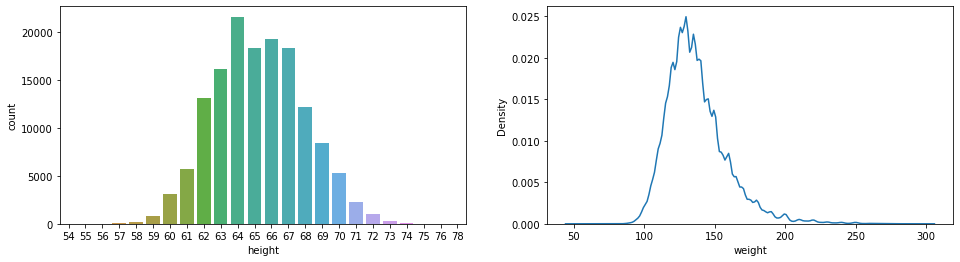

In [4]:
gv = fashion.genViz(df)
gv.genHeightWeight()

We see the bulk of the heights lying within the 63-38 inch range, while the majority of weight lies within the 110-150 lbs range. Since the clothing items present in the dataset are all women’s, we are assuming that close to all users are biological women, so these observed statistics are valid. 

We also found that overwhelmingly the reviews are 10/10, a common problem amongst rating data as people tend to only review when they have a strong opinion.  For this reason, we chose to stay away from predictions concerning the ratings as the options seen are not well distributed. 

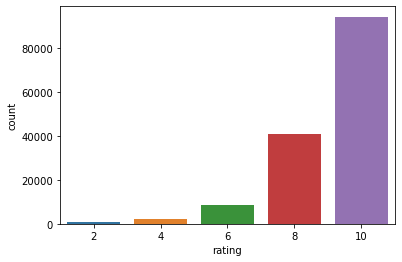

In [6]:
gv.genAgeRating(age = False, rating = True)

We also thought it was interesting how people self-reported an hourglass and athletic body shape the most, especially because these are thought of as the most “conventionally attractive”. 


((<Figure size 1152x576 with 1 Axes>,
  <AxesSubplot:xlabel='body type', ylabel='count'>),
 (<Figure size 1152x288 with 2 Axes>,
  array([<AxesSubplot:xlabel='cup', ylabel='count'>,
         <AxesSubplot:xlabel='bust', ylabel='count'>], dtype=object)))

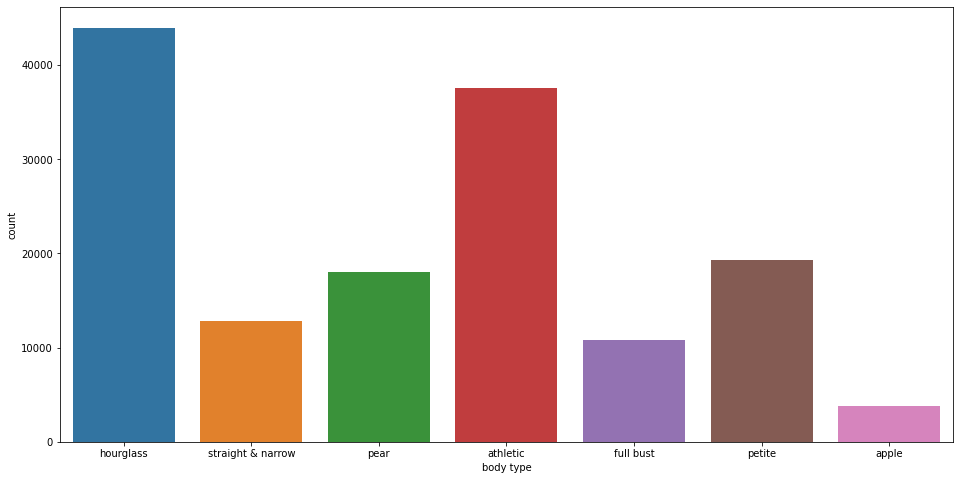

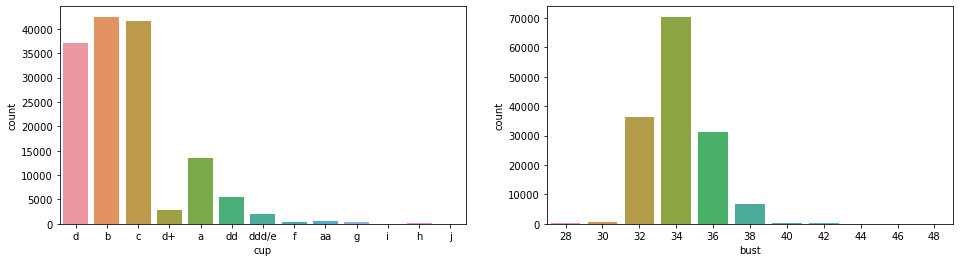

In [8]:
gv.genBodyType()

Regression between weight, height, and clothing size shows that there is some sort of correlation between these features and bust size. These plots were our motivation in trying to predict bust and cup sizes based on other features present in the review.

((<Figure size 1152x288 with 4 Axes>,
  array([<AxesSubplot:xlabel='weight', ylabel='bust'>,
         <AxesSubplot:xlabel='height', ylabel='bust'>,
         <AxesSubplot:xlabel='size', ylabel='bust'>,
         <AxesSubplot:xlabel='rating', ylabel='bust'>], dtype=object)),
 (<Figure size 1152x288 with 2 Axes>,
  array([<AxesSubplot:xlabel='cup', ylabel='count'>,
         <AxesSubplot:xlabel='bust', ylabel='count'>], dtype=object)))

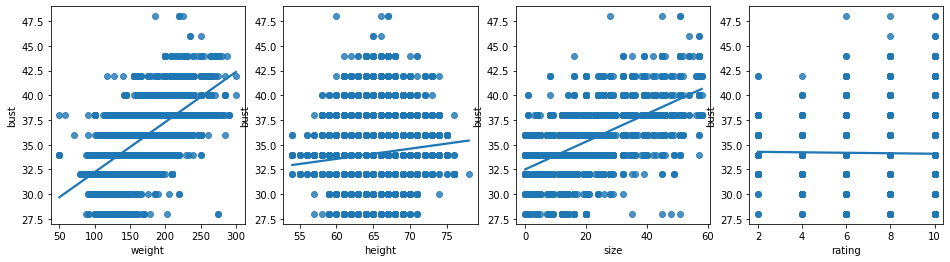

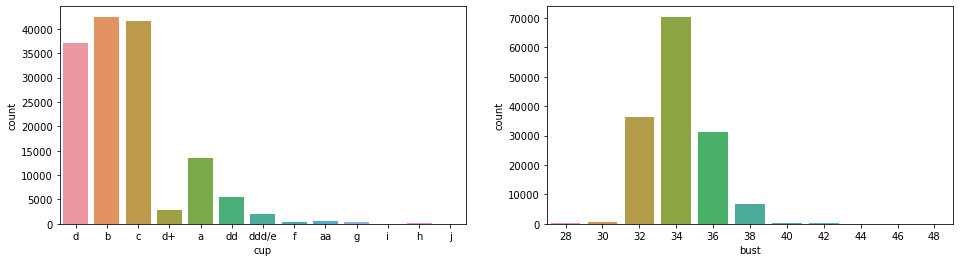

In [9]:
gv.genTrends(), gv.genBustCup()